In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import auth
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/hotel_booking_ini_yg_diedit.csv'
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
dropCols = ['company', 'days_in_waiting_list', 'country']
df.drop(dropCols, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Menghitung IQR
Q1 = df['lead_time'].quantile(0.25)
Q3 = df['lead_time'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
df = df[(df['lead_time'] >= lower_bound) & (df['lead_time'] <= upper_bound)]

In [ ]:
# Menghitung cancellation rate untuk setiap lead time dan jenis hotel
cancellation_data = df.groupby(['lead_time', 'hotel'])['is_canceled'].mean().reset_index()

# Memisahkan data untuk hotel city dan resort hotel
city_hotel_data = cancellation_data[cancellation_data['hotel'] == 'City Hotel']
resort_hotel_data = cancellation_data[cancellation_data['hotel'] == 'Resort Hotel']

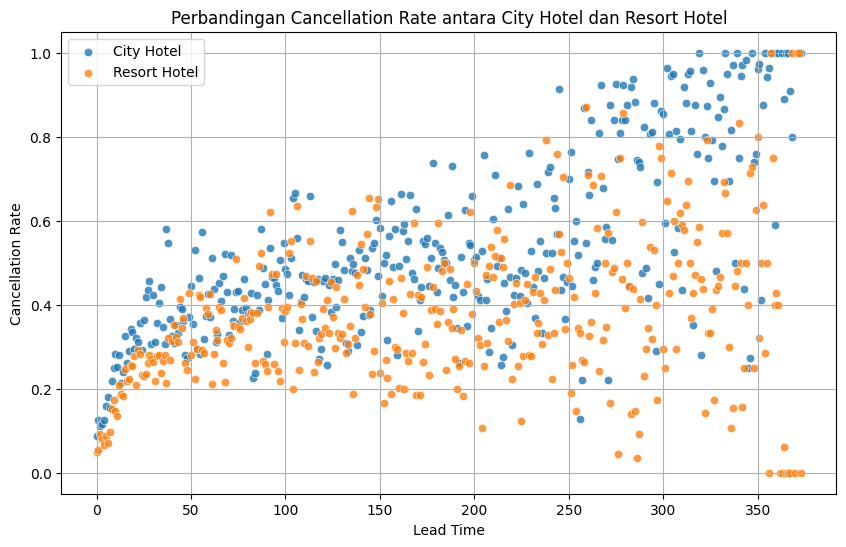

In [ ]:
# Membuat scatter plot untuk perbandingan cancellation rate dan lead time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=city_hotel_data, x='lead_time', y='is_canceled', label='City Hotel', alpha=0.8)
sns.scatterplot(data=resort_hotel_data, x='lead_time', y='is_canceled', label='Resort Hotel', alpha=0.8)

# Menambahkan label dan judul
plt.xlabel('Lead Time')
plt.ylabel('Cancellation Rate')
plt.title('Perbandingan Cancellation Rate antara City Hotel dan Resort Hotel')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.grid(True)  # Menambahkan grid jika diperlukan
plt.show()

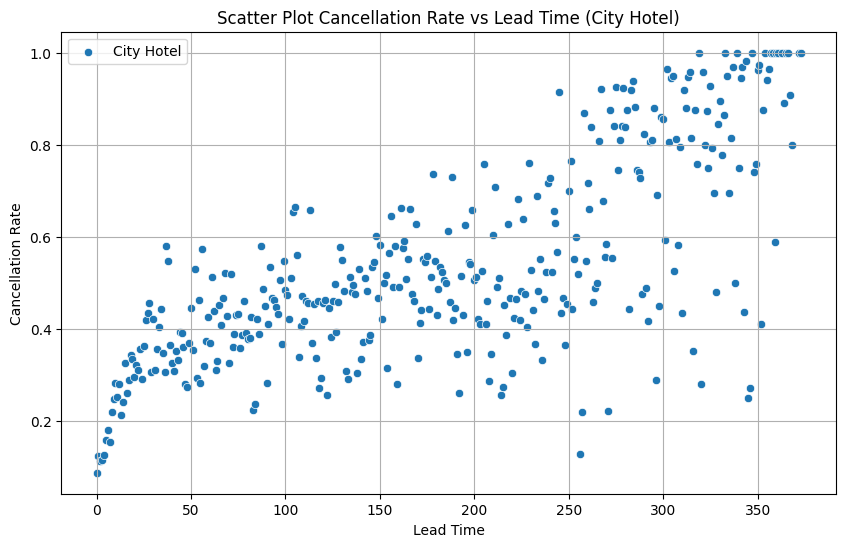

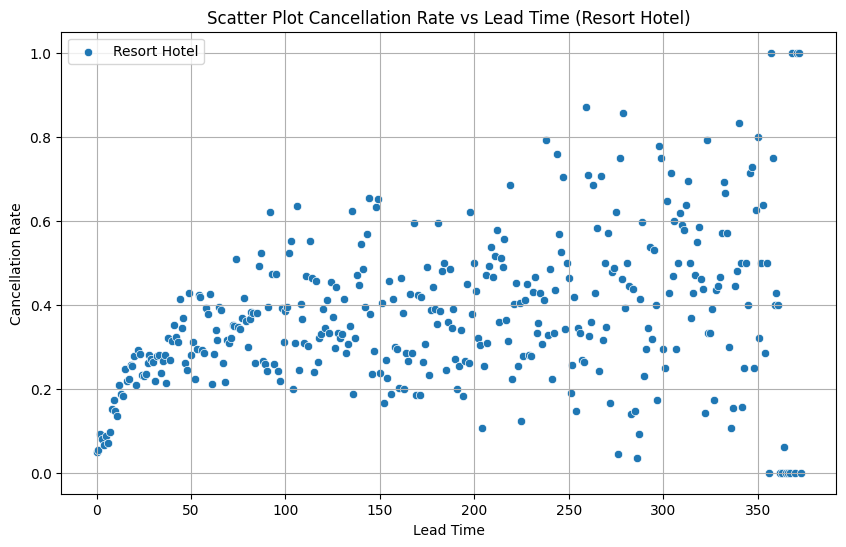

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=city_hotel_data, x='lead_time', y='is_canceled', label='City Hotel', alpha=1)

# Menambahkan label dan judul untuk City Hotel
plt.xlabel('Lead Time')
plt.ylabel('Cancellation Rate')
plt.title('Scatter Plot Cancellation Rate vs Lead Time (City Hotel)')

# Menampilkan plot untuk City Hotel
plt.grid(True)
plt.show()

# Membuat scatter plot untuk Resort Hotel
plt.figure(figsize=(10, 6))
sns.scatterplot(data=resort_hotel_data, x='lead_time', y='is_canceled', label='Resort Hotel', alpha=1)

# Menambahkan label dan judul untuk Resort Hotel
plt.xlabel('Lead Time')
plt.ylabel('Cancellation Rate')
plt.title('Scatter Plot Cancellation Rate vs Lead Time (Resort Hotel)')

# Menampilkan plot untuk Resort Hotel
plt.grid(True)
plt.show()

In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [ ]:
# Filter hanya data yang bukan outlier
df_no_outliers = df[(df['lead_time'] >= lower_bound) & (df['lead_time'] <= upper_bound)]
# 2 variable datafarema. ada df sama df_no_outliers
#df_only_outlier = df

In [ ]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116385 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           116385 non-null  object 
 1   is_canceled                     116385 non-null  int64  
 2   lead_time                       116385 non-null  int64  
 3   arrival_date_year               116385 non-null  int64  
 4   arrival_date_month              116385 non-null  object 
 5   arrival_date_week_number        116385 non-null  int64  
 6   arrival_date_day_of_month       116385 non-null  int64  
 7   stays_in_weekend_nights         116385 non-null  int64  
 8   stays_in_week_nights            116385 non-null  int64  
 9   adults                          116385 non-null  int64  
 10  children                        116381 non-null  float64
 11  babies                          116385 non-null  int64  
 12  meal            

In [ ]:
from google.colab import files

# Misalnya, jika DataFrame Anda disimpan dalam variabel df
df_no_outliers.to_csv('hotel150.csv', index=False)

# Unduh file CSV ke komputer lokal
files.download('hotel150.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116385 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           116385 non-null  object 
 1   is_canceled                     116385 non-null  int64  
 2   lead_time                       116385 non-null  int64  
 3   arrival_date_year               116385 non-null  int64  
 4   arrival_date_month              116385 non-null  object 
 5   arrival_date_week_number        116385 non-null  int64  
 6   arrival_date_day_of_month       116385 non-null  int64  
 7   stays_in_weekend_nights         116385 non-null  int64  
 8   stays_in_week_nights            116385 non-null  int64  
 9   adults                          116385 non-null  int64  
 10  children                        116381 non-null  float64
 11  babies                          116385 non-null  int64  
 12  meal            

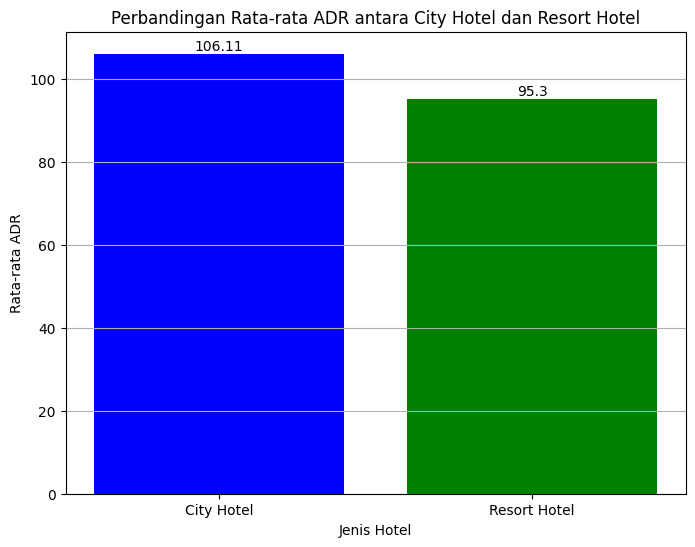

In [ ]:
# Kelompokkan data berdasarkan jenis hotel dan hitung rata-rata ADR
hotel_adr = df_no_outliers.groupby('hotel')['adr'].mean().reset_index()

# Membuat bar plot
plt.figure(figsize=(8, 6))  # Ukuran grafik
plt.bar(hotel_adr['hotel'], hotel_adr['adr'], color=['blue', 'green'])

# Menambahkan label sumbu dan judul
plt.xlabel('Jenis Hotel')
plt.ylabel('Rata-rata ADR')
plt.title('Perbandingan Rata-rata ADR antara City Hotel dan Resort Hotel')

# Menampilkan nilai rata-rata ADR di atas batang
for i, v in enumerate(hotel_adr['adr']):
    plt.text(i, v, round(v, 2), ha='center', va='bottom')

# Menampilkan grafik
plt.grid(axis='y')
plt.show()






In [ ]:
# Ubah kolom 'arrival_date_month' ke format datetime jika belum dalam format itu
df_no_outliers['arrival_date_month'] = pd.to_datetime(df['arrival_date_month'], format='%B')

# Kelompokkan data berdasarkan bulan dan jenis hotel, kemudian hitung rata-rata ADR
monthly_adr = df_no_outliers.groupby(['arrival_date_month', 'hotel'])['adr'].mean().unstack()

# Membuat line chart
plt.figure(figsize=(12, 6))  # Ukuran grafik
for hotel_type in monthly_adr.columns:
    plt.plot(monthly_adr.index, monthly_adr[hotel_type], marker='o', label=hotel_type)

# Menambahkan label sumbu dan judul
plt.xlabel('Bulan Kedatangan')
plt.ylabel('Rata-rata ADR')
plt.title('Perbandingan Rata-rata ADR antara City Hotel dan Resort Hotel per Bulan')

# Menambahkan legenda
plt.legend()

# Rotasi label bulan jika diperlukan agar lebih mudah dibaca
plt.xticks(rotation=45)

# Menampilkan grafik
plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: ignored